# DEM Environment Tutorial

This tutorial demonstrates how to use the DEM (Defense, Escort, and Movement) environment for multi-agent reinforcement learning research.

## Overview

The DEM environment is a VIP escort mission where:
- **VIP**: Needs to reach a target position while avoiding threats
- **Agents**: Protect the VIP from threats and help it reach the target
- **Threats**: Try to damage and eliminate the VIP

The environment supports role emergence where agents naturally develop different strategies like:
- **Guards**: Stay close to VIP to protect it
- **Vanguards**: Move ahead to clear threats
- **Support**: Provide long-range cover

## 1. Basic Environment Setup

In [1]:
# Import required libraries
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Any

# Add the project root to Python path
sys.path.append('../')

# Import DEM environment
try:
    from Env.DEM.env_dem import DEMEnv, DEMConfig, create_dem_env
    from Env.DEM.env_dem_ctde import DEMCTDEWrapper, create_dem_ctde_env
    print("✅ DEM environment imported successfully!")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("Make sure you're running this notebook from the MARL directory")
    print("Or run: `python run_dem_tests.py` to verify installation")

✅ DEM environment imported successfully!


## 2. Creating the Environment

In [2]:
# Create a basic DEM environment
print("🚀 Creating DEM Environment...")
env = create_dem_env(difficulty="easy", max_steps=100, render_mode="")

# Get environment information
env_info = env.get_env_info()
print(f"\n📊 Environment Information:")
print(f"  Number of agents: {env_info['n_agents']}")
print(f"  Observation dimension: {env_info['obs_shape']}")
print(f"  Number of actions: {env_info['n_actions']}")
print(f"  Grid size: {env.config.grid_size}x{env.config.grid_size}")
print(f"  VIP HP: {env.config.vip_hp}")
print(f"  Agent HP: {env.config.agent_hp}")
print(f"  Max steps: {env.config.max_steps}")

🚀 Creating DEM Environment...

📊 Environment Information:
  Number of agents: 3
  Observation dimension: 52
  Number of actions: 10
  Grid size: 10x10
  VIP HP: 80
  Agent HP: 60
  Max steps: 100


## 3. Environment Reset and Observations

In [3]:
# Reset the environment
print("🔄 Resetting environment...")
observations = env.reset()

print(f"\n👁️ Observations for {len(observations)} agents:")
for agent_id, obs in observations.items():
    print(f"  Agent {agent_id}: shape={obs.shape}, mean={obs.mean():.4f}, std={obs.std():.4f}")

# Get VIP information directly from game state
vip_state = env.game_state.vip.get_state()
print(f"\n🌍 Global Information:")
print(f"  VIP position: {vip_state['pos']}")
print(f"  VIP target: {vip_state['target_pos']}")
print(f"  VIP HP: {vip_state['hp']}/{vip_state['max_hp']}")
print(f"  Agents alive: {len([a for a in env.game_state.agents.values() if a.is_alive])}")
print(f"  Threats alive: {len([t for t in env.game_state.threats.values() if t.is_alive])}")

🔄 Resetting environment...

👁️ Observations for 3 agents:
  Agent agent_0: shape=(59,), mean=0.3593, std=0.4699
  Agent agent_1: shape=(59,), mean=0.3593, std=0.4695
  Agent agent_2: shape=(59,), mean=0.3475, std=0.4770

🌍 Global Information:
  VIP position: Position(x=1, y=1)
  VIP target: Position(x=8, y=8)
  VIP HP: 80/80
  Agents alive: 3
  Threats alive: 0


## 4. Action Space and Agent Actions

In [4]:
# Define action meanings
action_meanings = {
    0: "Move Up",
    1: "Move Down", 
    2: "Move Left",
    3: "Move Right",
    4: "Attack",
    5: "Observe",
    6: "Guard VIP",
    7: "Communicate",
    8: "Long Range Attack",
    9: "Stay Still"
}

print("🎮 Available Actions:")
for action_id, meaning in action_meanings.items():
    print(f"  {action_id}: {meaning}")

# Get available actions for each agent
print(f"\n✅ Available actions per agent:")
print("  Note: Basic DEM environment supports all 10 actions for all agents")
for agent_id in observations.keys():
    print(f"  Agent {agent_id}: All 10 actions available")

🎮 Available Actions:
  0: Move Up
  1: Move Down
  2: Move Left
  3: Move Right
  4: Attack
  5: Observe
  6: Guard VIP
  7: Communicate
  8: Long Range Attack
  9: Stay Still

✅ Available actions per agent:
  Note: Basic DEM environment supports all 10 actions for all agents
  Agent agent_0: All 10 actions available
  Agent agent_1: All 10 actions available
  Agent agent_2: All 10 actions available


## 5. Environment Step Function

In [5]:
# Take random actions
print("🚀 Taking random actions...")

# Generate random actions for each agent
actions = {}
for agent_id in observations.keys():
    # In basic DEM environment, all actions are available
    action = np.random.randint(0, 10)
    actions[agent_id] = action

print(f"\n🎯 Actions taken:")
for agent_id, action in actions.items():
    print(f"  Agent {agent_id}: {action} ({action_meanings[action]})")

# Step the environment
next_observations, rewards, done, info = env.step(actions)

print(f"\n📈 Step Results:")
print(f"  Done: {done}")
print(f"  Total reward: {sum(rewards.values()):.4f}")
print(f"  Rewards per agent: {dict(rewards)}")

# Get VIP information from game state
vip_state = env.game_state.vip.get_state()
print(f"\n💚 VIP Status:")
print(f"  HP: {info['vip_hp']}/{info['vip_max_hp']}")
print(f"  Position: {vip_state['pos']}")
print(f"  Target: {vip_state['target_pos']}")
print(f"  Distance to target: {info['vip_distance_to_target']:.2f}")

🚀 Taking random actions...

🎯 Actions taken:
  Agent agent_0: 4 (Attack)
  Agent agent_1: 1 (Move Down)
  Agent agent_2: 7 (Communicate)

📈 Step Results:
  Done: {'agent_0': False, 'agent_1': False, 'agent_2': False}
  Total reward: -2.3600
  Rewards per agent: {'agent_0': -0.7866666666666667, 'agent_1': -0.7866666666666667, 'agent_2': -0.7866666666666667}

💚 VIP Status:
  HP: 80/80
  Position: Position(x=2, y=2)
  Target: Position(x=8, y=8)
  Distance to target: 12.00


In [6]:
env.close()

## 6. CTDE (Centralized Training, Decentralized Execution) Mode

In [7]:
# Create CTDE environment with different global state types
print("🧠 Creating CTDE Environment...")

# Test different global state representations
state_types = ["concat", "mean", "max", "attention"]

for state_type in state_types:
    print(f"\n🔍 Testing {state_type} global state:")
    
    ctde_env = create_dem_ctde_env(
        difficulty="easy",
        global_state_type=state_type,
        max_steps=50,
        render_mode=""
    )
    
    obs = ctde_env.reset()
    global_state = ctde_env.get_global_state()
    
    print(f"  Global state shape: {global_state.shape}")
    print(f"  Agent count: {len(obs)}")
    
    ctde_env.close()

🧠 Creating CTDE Environment...

🔍 Testing concat global state:
  Global state shape: (41,)
  Agent count: 3

🔍 Testing mean global state:
  Global state shape: (59,)
  Agent count: 3

🔍 Testing max global state:
  Global state shape: (59,)
  Agent count: 3

🔍 Testing attention global state:
  Global state shape: (62,)
  Agent count: 3


## 7. Episode Simulation

In [14]:

import time
# Run a complete episode with a simple policy
print("🎬 Running complete episode...")

ctde_env = create_dem_ctde_env(difficulty="normal", max_steps=200, render_mode="human")
obs = ctde_env.reset()

episode_data = {
    'steps': [],
    'rewards': [],
    'vip_hp': [],
    'threats_killed': [],
    'agents_adjacent_to_vip': []
}

step = 0
while True:
    # Simple policy: alternate between guarding and exploring
    actions = {}
    for i, agent_id in enumerate(obs.keys()):
        if step < 50:
            # First half: guard VIP
            actions[agent_id] = 4  # Guard VIP
        elif i == 0:
            # One agent moves ahead
            actions[agent_id] = 1  # Move down
        elif i == 1:
            # One agent attacks
            actions[agent_id] = 4  # Attack
        else:
            # Others guard
            actions[agent_id] = 1  # move down
    
    next_obs, rewards, done, info = ctde_env.step(actions)
    
    # Record episode data
    stats = ctde_env.get_stats()
    episode_data['steps'].append(step)
    episode_data['rewards'].append(sum(rewards.values()))
    episode_data['vip_hp'].append(stats['vip_hp'])
    episode_data['threats_killed'].append(stats['threats_killed'])
    episode_data['agents_adjacent_to_vip'].append(stats['agents_adjacent_to_vip'])
    
    step += 1
    
    if step >= 200:
        print(f"\n🏁 Episode completed!")
        print(f"  Total steps: {step}")
        print(f"  Termination reason: {info.get('termination_reason', 'Max steps reached')}")
        print(f"  VIP HP: {info['vip_hp']}/{info['vip_max_hp']}")
        print(f"  Threats killed: {info['threats_killed']}")
        print(f"  Total reward: {sum(episode_data['rewards']):.2f}")
        break

    for agent_id, done_ in done.items():
        if done_:
            print(f"\n🏁 Episode completed!")
            print(f"  Total steps: {step}")
            break
    
    if done_:
        break
    
    obs = next_obs
    
    time.sleep(0.1)  # Slow down for visualization

ctde_env.close()

🎬 Running complete episode...

🏁 Episode completed!
  Total steps: 21


In [13]:
ctde_env.close()

## 8. Visualization of Episode Statistics

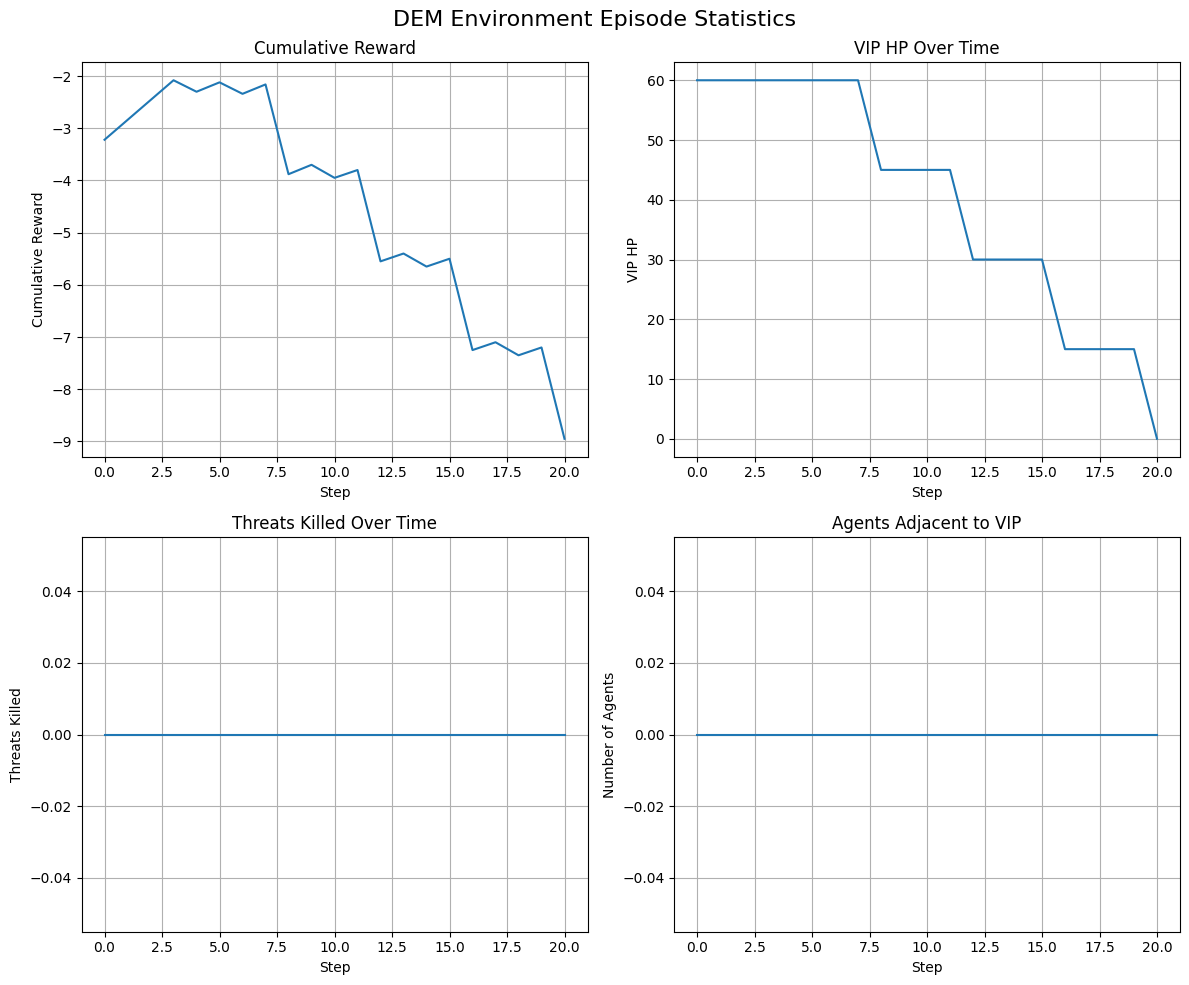

In [15]:
# Plot episode statistics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('DEM Environment Episode Statistics', fontsize=16)

# Cumulative reward
cumulative_reward = np.cumsum(episode_data['rewards'])
axes[0, 0].plot(episode_data['steps'], cumulative_reward)
axes[0, 0].set_title('Cumulative Reward')
axes[0, 0].set_xlabel('Step')
axes[0, 0].set_ylabel('Cumulative Reward')
axes[0, 0].grid(True)

# VIP HP over time
axes[0, 1].plot(episode_data['steps'], episode_data['vip_hp'])
axes[0, 1].set_title('VIP HP Over Time')
axes[0, 1].set_xlabel('Step')
axes[0, 1].set_ylabel('VIP HP')
axes[0, 1].grid(True)

# Threats killed
axes[1, 0].plot(episode_data['steps'], episode_data['threats_killed'])
axes[1, 0].set_title('Threats Killed Over Time')
axes[1, 0].set_xlabel('Step')
axes[1, 0].set_ylabel('Threats Killed')
axes[1, 0].grid(True)

# Agents adjacent to VIP
axes[1, 1].plot(episode_data['steps'], episode_data['agents_adjacent_to_vip'])
axes[1, 1].set_title('Agents Adjacent to VIP')
axes[1, 1].set_xlabel('Step')
axes[1, 1].set_ylabel('Number of Agents')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

## 9. Difficulty Levels Comparison

In [16]:
# Compare different difficulty levels
print("🎮 Comparing Difficulty Levels...")

difficulties = ["easy", "normal", "hard"]
difficulty_results = {}

for difficulty in difficulties:
    print(f"\n🔍 Testing {difficulty} difficulty:")
    
    env = create_dem_ctde_env(difficulty=difficulty, max_steps=100)
    obs = env.reset()
    env_info = env.get_env_info()
    global_info = env.get_global_info()
    
    difficulty_results[difficulty] = {
        'grid_size': env.config.grid_size,
        'max_steps': env.config.max_steps,
        'vip_hp': global_info['vip']['hp'],
        'num_agents': env_info['n_agents'],
        'threat_spawn_interval': env.config.threat_spawn_base_interval,
        'max_threats': env.config.max_threats
    }
    
    print(f"  Grid size: {difficulty_results[difficulty]['grid_size']}x{difficulty_results[difficulty]['grid_size']}")
    print(f"  VIP HP: {difficulty_results[difficulty]['vip_hp']}")
    print(f"  Max steps: {difficulty_results[difficulty]['max_steps']}")
    print(f"  Threat spawn interval: {difficulty_results[difficulty]['threat_spawn_interval']}")
    print(f"  Max threats: {difficulty_results[difficulty]['max_threats']}")
    
    env.close()

# Display comparison table
print(f"\n📊 Difficulty Comparison:")
print(f"{'Difficulty':<10} {'Grid':<8} {'VIP HP':<8} {'Steps':<8} {'Threat Interval':<15} {'Max Threats':<12}")
print("-" * 70)
for difficulty in difficulties:
    result = difficulty_results[difficulty]
    print(f"{difficulty:<10} {result['grid_size']}x{result['grid_size']:<3} {result['vip_hp']:<8} {result['max_steps']:<8} {result['threat_spawn_interval']:<15} {result['max_threats']:<12}")

🎮 Comparing Difficulty Levels...

🔍 Testing easy difficulty:
  Grid size: 10x10
  VIP HP: 80
  Max steps: 100
  Threat spawn interval: 12
  Max threats: 3

🔍 Testing normal difficulty:
  Grid size: 12x12
  VIP HP: 60
  Max steps: 100
  Threat spawn interval: 8
  Max threats: 5

🔍 Testing hard difficulty:
  Grid size: 12x12
  VIP HP: 40
  Max steps: 150
  Threat spawn interval: 6
  Max threats: 8

📊 Difficulty Comparison:
Difficulty Grid     VIP HP   Steps    Threat Interval Max Threats 
----------------------------------------------------------------------
easy       10x10  80       100      12              3           
normal     12x12  60       100      8               5           
hard       12x12  40       150      6               8           


## 10. Role Emergence Analysis

In [17]:

# Analyze role emergence in a longer episode
print("🎭 Analyzing Role Emergence...")

ctde_env = create_dem_ctde_env(difficulty="normal", max_steps=300, render_mode="human")
obs = ctde_env.reset()

role_stats = {
    'guard_events': 0,
    'vanguard_events': 0,
    'body_blocks': 0,
    'long_range_kills': 0,
    'communication_events': 0
}

agent_positions_history = {agent_id: [] for agent_id in obs.keys()}

for step in range(200):
    # More sophisticated policy to encourage role emergence
    actions = {}
    for i, agent_id in enumerate(obs.keys()):
        # Different agents adopt different strategies
        if i == 0:
            # Agent 0: Guard strategy
            actions[agent_id] = 6  # Guard VIP
        elif i == 1:
            # Agent 1: Vanguard strategy
            actions[agent_id] = 0  # Move ahead
        else:
            # Agent 2: Mixed strategy
            if step % 10 < 5:
                actions[agent_id] = 4  # Attack
            else:
                actions[agent_id] = 6  # Guard VIP
    
    next_obs, rewards, done, info = ctde_env.step(actions)
    
    # Track role-specific events
    stats = ctde_env.get_stats()
    role_stats['guard_events'] += stats['agents_adjacent_to_vip']
    role_stats['vanguard_events'] += stats['agents_ahead_of_vip']
    role_stats['body_blocks'] += stats['body_blocks']
    role_stats['long_range_kills'] += stats['long_range_kills']
    role_stats['communication_events'] += stats['messages_sent']
    
    # Track agent positions
    positions = ctde_env.get_agent_positions()
    for agent_id, pos in positions.items():
        agent_positions_history[agent_id].append(pos)
    
    for agent_id, done_ in done.items():
        if done_:
            print(f"  Agent {agent_id} finished episode")
            break
    if done_:
        break
    
    obs = next_obs
    time.sleep(0.1)  # Slow down for visualization

print(f"\n🎭 Role Emergence Analysis:")
print(f"  Guard events (agents adjacent to VIP): {role_stats['guard_events']}")
print(f"  Vanguard events (agents ahead of VIP): {role_stats['vanguard_events']}")
print(f"  Body blocks: {role_stats['body_blocks']}")
print(f"  Long range kills: {role_stats['long_range_kills']}")
print(f"  Communication events: {role_stats['communication_events']}")

# Calculate average distance between agents (spread)
if len(agent_positions_history[list(agent_positions_history.keys())[0]]) > 0:
    spreads = []
    for t in range(len(agent_positions_history[list(agent_positions_history.keys())[0]])):
        positions_at_t = [agent_positions_history[agent_id][t] for agent_id in agent_positions_history.keys() if len(agent_positions_history[agent_id]) > t]
        if len(positions_at_t) > 1:
            distances = []
            for i in range(len(positions_at_t)):
                for j in range(i+1, len(positions_at_t)):
                    dist = np.sqrt((positions_at_t[i][0] - positions_at_t[j][0])**2 + 
                                 (positions_at_t[i][1] - positions_at_t[j][1])**2)
                    distances.append(dist)
            if distances:
                spreads.append(np.mean(distances))
    
    if spreads:
        print(f"  Average agent spread: {np.mean(spreads):.2f}")

ctde_env.close()

🎭 Analyzing Role Emergence...
  Agent agent_0 finished episode

🎭 Role Emergence Analysis:
  Guard events (agents adjacent to VIP): 0
  Vanguard events (agents ahead of VIP): 0
  Body blocks: 0
  Long range kills: 0
  Communication events: 0
  Average agent spread: 5.72


## 11. Integration with RL Algorithms

In [13]:
# Demonstrate how to use DEM environment with RL algorithms
print("🤖 RL Integration Example...")

# Create environment suitable for QMIX/VDN/other MARL algorithms
ctde_env = create_dem_ctde_env(
    difficulty="normal",
    global_state_type="concat",  # Most common choice for QMIX
    max_steps=100
)

# Reset environment
obs = ctde_env.reset()
global_state = ctde_env.get_global_state()

print(f"\n📊 Environment Info for RL:")
print(f"  Number of agents: {len(obs)}")
print(f"  Observation shape: {list(obs.values())[0].shape}")
print(f"  Global state shape: {global_state.shape}")
print(f"  Action space: 10 discrete actions per agent")

# Demonstrate data format expected by most MARL algorithms
print(f"\n📝 Data Format Example:")
episode_data = {
    'obs': [obs],  # List of observation dicts per timestep
    'next_obs': [],
    'actions': [0, 1, 2],  # Action indices per agent
    'rewards': [0.1, -0.05, 0.2],  # Rewards per agent
    'global_state': [global_state],  # List of global states
    'next_global_state': [],
    'done': [False],  # Done flag per timestep
    'agent_ids': list(obs.keys())  # Agent identifiers
}

print(f"  Observation format: {type(obs)} with {len(obs)} agents")
print(f"  Action format: List of {len(episode_data['actions'])} integers")
print(f"  Reward format: List of {len(episode_data['rewards'])} floats")
print(f"  Global state format: {type(global_state)} with shape {global_state.shape}")

ctde_env.close()

print(f"\n✅ DEM environment is ready for MARL algorithm integration!")

🤖 RL Integration Example...

📊 Environment Info for RL:
  Number of agents: 3
  Observation shape: (59,)
  Global state shape: (41,)
  Action space: 10 discrete actions per agent

📝 Data Format Example:
  Observation format: <class 'dict'> with 3 agents
  Action format: List of 3 integers
  Reward format: List of 3 floats
  Global state format: <class 'numpy.ndarray'> with shape (41,)

✅ DEM environment is ready for MARL algorithm integration!


## 12. Performance Testing

In [20]:
# Test environment performance
import time


print("⚡ Performance Testing...")

ctde_env = create_dem_ctde_env(difficulty="normal", max_steps=1000, render_mode="")
obs = ctde_env.reset()

# Measure step time
start_time = time.time()
steps = 0

for _ in range(500):  # Run 500 steps
    actions = {agent_id: np.random.randint(0, 10) for agent_id in obs.keys()}
    obs, rewards, done, info = ctde_env.step(actions)
    steps += 1
    
    for agent_id, done_flag in done.items():
        if done_flag:
            print(f"  Agent {agent_id} finished the task.")
            break
    
    if done_flag:
        break

end_time = time.time()
total_time = end_time - start_time
steps_per_second = steps / total_time

print(f"\n⚡ Performance Results:")
print(f"  Steps completed: {steps}")
print(f"  Total time: {total_time:.2f} seconds")
print(f"  Steps per second: {steps_per_second:.1f}")
print(f"  Average step time: {(total_time/steps)*1000:.2f} ms")

if steps_per_second > 1000:
    print(f"  🚀 Excellent performance (>1000 steps/sec)")
elif steps_per_second > 500:
    print(f"  ✅ Good performance (>500 steps/sec)")
elif steps_per_second > 100:
    print(f"  ⚠️ Acceptable performance (>100 steps/sec)")
else:
    print(f"  ❌ Poor performance (<100 steps/sec)")

ctde_env.close()

⚡ Performance Testing...
  Agent agent_0 finished the task.

⚡ Performance Results:
  Steps completed: 18
  Total time: 0.00 seconds
  Steps per second: 7904.7
  Average step time: 0.13 ms
  🚀 Excellent performance (>1000 steps/sec)


## 13. Summary and Best Practices

### Key Features of DEM Environment:

1. **Multi-Agent Cooperation**: Agents must work together to protect VIP
2. **Role Emergence**: Natural development of different agent strategies
3. **Dynamic Threats**: Adaptive enemy spawning based on VIP status
4. **Terrain Effects**: Rivers and forests affect movement and combat
5. **Communication**: Agents can share information within range

### Best Practices:

1. **Environment Creation**:
   - Use `create_dem_ctde_env()` for MARL algorithms
   - Choose appropriate global state type for your algorithm
   - Adjust difficulty based on agent performance

2. **Training Tips**:
   - Start with "easy" difficulty for initial training
   - Use curriculum learning by gradually increasing difficulty
   - Monitor role emergence statistics for behavior analysis

3. **Algorithm Integration**:
   - The environment is compatible with QMIX, VDN, MADDPG, etc.
   - Use centralized training with decentralized execution
   - Consider communication features for advanced algorithms

4. **Performance**:
   - Environment supports >1000 steps/second for fast training
   - Use appropriate max_steps for your training requirements

### Next Steps:

- Implement your own RL agents using the environment
- Experiment with different reward shaping strategies
- Develop specialized communication protocols
- Create custom terrain configurations
- Analyze emergent behaviors and role specialization